In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set = pd.read_csv('./data/nasa_turbofan/train_FD001.txt',sep=' ',header=None)

In [3]:
test_set = pd.read_csv('./data/nasa_turbofan/test_FD001.txt',sep=' ', header=None)

In [4]:
test_rul = pd.read_csv('./data/nasa_turbofan/RUL/RUL_FD001.txt',header = None)

In [5]:
train_set.shape, test_set.shape, test_rul.shape

((20631, 28), (13096, 28), (100, 1))

In [6]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [7]:
column_names = ['engine','cycle','opt_1','opt_2','opt_3']

for i in range(1,train_set.shape[1]-4):
    column_names.append(f'sensor_{i}')

In [8]:
print(column_names)

['engine', 'cycle', 'opt_1', 'opt_2', 'opt_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23']


In [9]:
train_set.columns = column_names

In [10]:
test_set.columns = column_names

In [11]:
test_rul.columns = ['rul']

In [12]:
train_set.head()

,engine,cycle,opt_1,opt_2,opt_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [13]:
train_set.drop(['sensor_22','sensor_23'],axis=1,inplace=True)

In [14]:
test_set.drop(['sensor_22','sensor_23'],axis=1,inplace=True)

In [15]:
def columns_to_remove(df):
    columns = []
    for i in df.columns:
        if df[i].std() <= 0.02:
            columns.append(i)
    return columns

In [16]:
useless_columns = columns_to_remove(train_set)

In [17]:
train_set.drop(useless_columns,axis=1,inplace=True)
test_set.drop(useless_columns,axis=1,inplace=True)

In [18]:
train_set.shape, test_set.shape

((20631, 16), (13096, 16))

In [19]:
train_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [20]:
train_rul = pd.DataFrame(train_set.groupby('engine')['cycle'].max().reset_index())
train_rul.columns = ['engine','end']

In [21]:
train_set = pd.merge(train_set, train_rul, on='engine', how='left')

In [22]:
train_set['RUL'] = train_set['end'] - train_set['cycle'] 

In [23]:
train_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,end,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


In [24]:
test_end = pd.DataFrame(test_set.groupby('engine')['cycle'].max().reset_index())
test_end.columns = ['engine','end']

In [25]:
test_set = pd.merge(test_set,test_end,on='engine',how='left')

In [51]:
test_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,end
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31


In [53]:
test_rul.reset_index(inplace=True)
test_rul.columns = ['engine','RUL']

In [55]:
test_rul['engine'] = test_rul['engine']+1

In [57]:
test_set = pd.merge(test_set,test_rul,on='engine',how='left')

In [59]:
test_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,end,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,112
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,112
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,112
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,112
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,112


In [61]:
test_set['RUL'] = test_set['RUL'] - test_set['cycle'] + test_set['end']

In [63]:
test_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,end,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,142
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,141
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,140
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,139
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,138


In [65]:
warning_cycle = 50
train_set['failure'] = np.where(train_set['RUL'] <= warning_cycle, 1, 0 )
test_set['failure'] = np.where(test_set['RUL'] <= warning_cycle, 1, 0 )

In [67]:
train_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,end,RUL,failure
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191,0
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190,0
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189,0
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188,0
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187,0


In [69]:
train_set.drop(['end','RUL'],axis=1,inplace=True)

In [71]:
test_set.drop(['RUL'],axis=1,inplace=True)

In [75]:
test_set.drop(['end'],axis=1,inplace=True)

<Axes: >

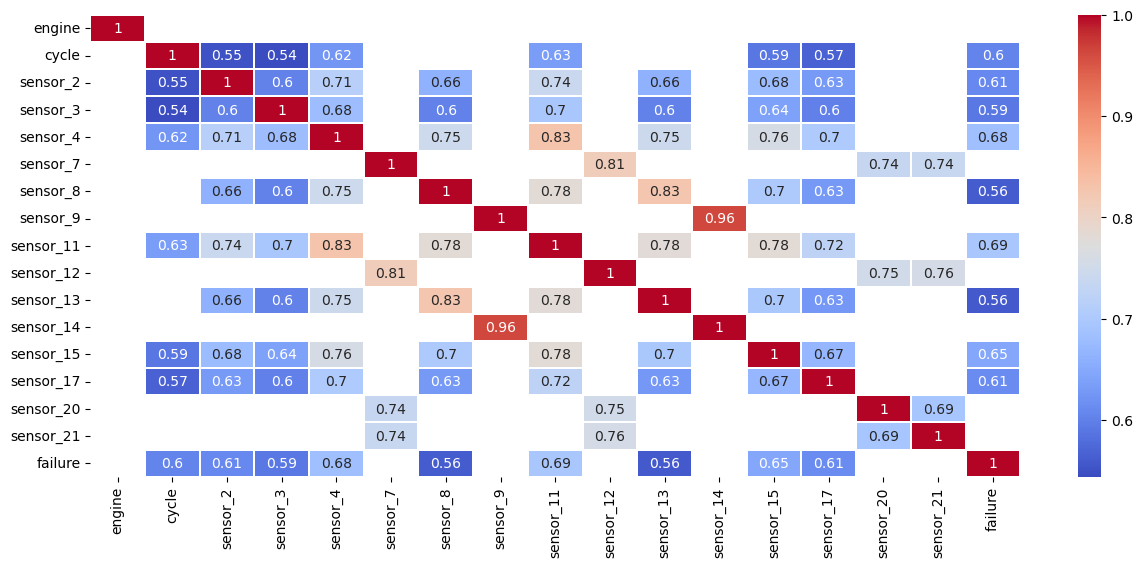

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(train_set.corr()[train_set.corr()>0.5],annot=True,linewidth=0.1,cmap='coolwarm')

In [79]:
train_set.drop('sensor_14',axis=1,inplace=True)
test_set.drop('sensor_14',axis=1,inplace=True)

In [81]:
train_set.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,failure
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,0
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,0
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,0
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,0
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,0


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [85]:
train_features = train_set.copy()
train_target = train_features.pop('failure')

In [87]:
test_features = test_set.copy()
test_target = test_features.pop('failure')

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2,stratify=train_target)

In [91]:
X_test = test_features.copy()
y_test = test_target.copy()

In [93]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((16504, 15), (4127, 15), (16504,), (4127,), (13096, 15), (13096,))

In [95]:
X_train[X_train.columns[1:]] = scaler.fit_transform(X_train[X_train.columns[1:]])
X_val[X_train.columns[1:]] = scaler.transform(X_val[X_train.columns[1:]])
X_test[X_train.columns[1:]] = scaler.transform(X_test[X_train.columns[1:]])

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse_output=False), ['engine'])
], remainder='passthrough'
)

# X_train_enc = pd.DataFrame(encoder.fit_transform(pd.DataFrame(X_train['engine'])))
# X_val_enc = pd.DataFrame(encoder.transform(pd.DataFrame(X_val['engine'])))
# X_test_enc = pd.DataFrame(encoder.transform(pd.DataFrame(X_test['engine'])))

In [346]:
# X_train = pd.DataFrame(encoder.fit_transform(X_train),columns=encoder.get_feature_names_out())
# X_val = pd.DataFrame(encoder.transform(X_val),columns=encoder.get_feature_names_out())
# X_test = pd.DataFrame(encoder.transform(X_test),columns=encoder.get_feature_names_out())

In [130]:
results = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1-score'])

In [101]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def show_metrics(y_pred, y_test, opt = 'train'):
    accuracy = accuracy_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    recall = recall_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)

    print(f'Accuracy {opt}: {accuracy:.3f}')
    print(f'Precision {opt}: {precision:.3f}')
    print(f'Recall {opt}: {recall:.3f}')
    print(f'F1-score {opt}: {f1:.3f}')
    print('=============================')
    
    return accuracy, precision, recall, f1

In [135]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

y_pred = model_logreg.predict(X_train)
show_metrics(y_pred,y_train)

y_pred = model_logreg.predict(X_val)
show_metrics(y_pred,y_val, 'val')

y_pred = model_logreg.predict(X_test)
accuracy, precision, recall, f1 = show_metrics(y_pred,y_test, 'test')

results = pd.concat([results, pd.DataFrame({'Model': ['LogReg'], 
                                            'Accuracy': [accuracy], 'Recall': [recall], 
                                            'Precision': [precision], 'F1-score': [f1]})])

Accuracy train: 0.929
Precision train: 0.817
Recall train: 0.888
F1-score train: 0.851
Accuracy val: 0.928
Precision val: 0.825
Recall val: 0.878
F1-score val: 0.850
Accuracy test: 0.963
Precision test: 0.597
Recall test: 0.808
F1-score test: 0.687


C:\Users\druzh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_train)
show_metrics(y_pred,y_train)

y_pred = model_tree.predict(X_val)
show_metrics(y_pred,y_val, 'val')

y_pred = model_tree.predict(X_test)
accuracy, precision, recall, f1 = show_metrics(y_pred,y_test, 'test')

results = pd.concat([results, pd.DataFrame({'Model': ['DecisionTree'], 
                                            'Accuracy': [accuracy], 'Recall': [recall], 
                                            'Precision': [precision], 'F1-score': [f1]})])

Accuracy train: 1.000
Precision train: 1.000
Recall train: 1.000
F1-score train: 1.000
Accuracy val: 0.906
Precision val: 0.806
Recall val: 0.811
F1-score val: 0.808
Accuracy test: 0.941
Precision test: 0.624
Recall test: 0.559
F1-score test: 0.590


In [139]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

y_pred = model_forest.predict(X_train)
show_metrics(y_pred,y_train)

y_pred = model_forest.predict(X_val)
show_metrics(y_pred,y_val, 'val')

y_pred = model_forest.predict(X_test)
accuracy, precision, recall, f1 = show_metrics(y_pred,y_test, 'test')

results = pd.concat([results, pd.DataFrame({'Model': ['Forest'], 
                                            'Accuracy': [accuracy], 'Recall': [recall], 
                                            'Precision': [precision], 'F1-score': [f1]})])

Accuracy train: 1.000
Precision train: 1.000
Recall train: 1.000
F1-score train: 1.000
Accuracy val: 0.937
Precision val: 0.839
Recall val: 0.897
F1-score val: 0.867
Accuracy test: 0.966
Precision test: 0.626
Recall test: 0.831
F1-score test: 0.714


In [141]:
results

,Model,Accuracy,Recall,Precision,F1-score
0,LogReg,0.963119,0.807634,0.597065,0.686567
0,DecisionTree,0.94128,0.559151,0.624153,0.589867
0,Forest,0.966097,0.830838,0.626411,0.714286


In [143]:
def sequence_generator(feature_df, seq_length, seq_cols):

    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]

    # We want to generate sequences of 50 timesteps at a time.
    # Hence, we will iterate over two sets of indices: (0,142),(50,192).
    # For example, id1 has 192 rows, and its sequence_length is equal to 50.
    # 0 50 -> From row 0 to row 50
    # 1 51 -> From row 1 to row 51
    # 2 52 -> From row 2 to row 52
    # ...
    # 141 191 -> From row 141 to row 191

    for start, stop in zip(range(0, num_elements - seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]

In [145]:
def label_generator(label_df, seq_length, label):
    # Funtion will return
    # This function will return the following:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]]
    # Convert the labels into a NumPy 2D array. 

    label_array = label_df[label].values
    num_elements = label_array.shape[0]
        # Remove the first label, as the first prediction will be the (seq_length+1)th label. 
    return label_array[seq_length:num_elements, :]

In [147]:
train_set_norm = train_set.copy()
train_set_norm[train_set_norm.columns[1:-1]] = scaler.fit_transform(train_set_norm[train_set_norm.columns[1:-1]])

In [149]:
train_set_norm.head()

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,failure
0,1,0.00000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,0
1,1,0.00277,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,0
2,1,0.00554,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,0
3,1,0.00831,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,0
4,1,0.01108,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,0


In [151]:
seq_gen = (list(sequence_generator(train_set_norm[train_set_norm['engine']==id], 50, ["sensor_2"])) # We take only one feature (s2).
           for id in train_set_norm['engine'].unique())

seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape

(15631, 50, 1)

In [153]:
label_gen = [label_generator(train_set_norm[train_set_norm['engine']==id], 50, ["failure"]) 
             for id in train_set_norm['engine'].unique()]
label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

(15631, 1)

In [155]:
import keras
from keras import layers
from keras.models import Sequential

In [157]:
out_dim = label_set.shape[1] # 1 label/output for one sequence.
features_dim = seq_set.shape[2] # Number of features (1)
sequence_length = 50

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

Features dimension:  1
Output dimension:  1


In [159]:
model_RNN_1 = Sequential([
    
    layers.SimpleRNN(units=1,
                     return_sequences=False,
                     input_shape=(sequence_length, features_dim)),
    # layers.SimpleRNN(units=50, 
    #                  return_sequences=False),
    # layers.Dropout(0.08),
    layers.Dense(units=out_dim, activation='sigmoid')
])

model_RNN_1.summary()

model_RNN_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model_RNN_1.fit(seq_set,label_set,batch_size=16,epochs=30,validation_split=0.5, callbacks=early_stop)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
489/489 [==============================] - 9s 15ms/step - loss: 0.6754 - accuracy: 0.6362 - val_loss: 0.6492 - val_accuracy: 0.6868
Epoch 2/30
489/489 [==============================] - 7s 14ms/step - loss: 0.6598 - accuracy: 0.6607 - val_loss: 0.6381 - val_accuracy: 0.6868
Epoch 3/30
489/489 [==============================] - 7s 14ms/step - loss: 0.6515 - accuracy: 0.6607 - val_loss: 0.6316 - val_accuracy

In [161]:
def plot_model_accuracy(model_name_history, width = 5, height = 5):

    fig_acc = plt.figure(figsize=(width, height))
    plt.plot(model_name_history.history['accuracy'])
    plt.plot(model_name_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

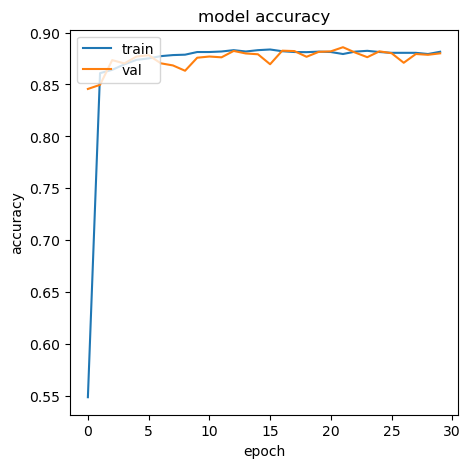

In [839]:
plot_model_accuracy(history)

In [163]:
from sklearn.metrics import confusion_matrix

def analyze_model_on_train_set(input_sequence_set, model_name):

    # The training metrics are as follows:
    model_history_scores = model_name.evaluate(input_sequence_set, label_set, verbose=1, batch_size=50)
    print('Train Accurracy: {}'.format(model_history_scores[1]))

    # Make predictions and compute the confusion matrix.
    y_pred = (model_name.predict(input_sequence_set, verbose=1, batch_size=200) > 0.5).astype("int32")
    y_true = label_set

    # test_set = pd.DataFrame(y_pred)
    # test_set.to_csv('binary_submit_train.csv', index = None)

    print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
    model_cm = confusion_matrix(y_true, y_pred)
    print(model_cm)

    # Compute the precision and recall.
    model_precision = precision_score(y_true, y_pred)
    model_recall = recall_score(y_true, y_pred)
    print( 'Train Precision = ', model_precision, '\n', 'Train Recall = ', model_recall)

# Call the function.
analyze_model_on_train_set(seq_set, model_RNN_1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2926 - accuracy: 0.8803
Train Accurracy: 0.8803019523620605
79/79 [==============================] - 0s 4ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[9808  723]
 [1148 3952]]
Train Precision =  0.8453475935828877 
 Train Recall =  0.7749019607843137


In [165]:
test_set_norm = test_set.copy()
test_set_norm[test_set_norm.columns[1:-1]] = scaler.transform(test_set_norm[test_set_norm.columns[1:-1]])
test_set_norm.head(3)

,engine,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,failure
0,1,0.00000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.308965,0.333333,0.558140,0.661834,0
1,1,0.00277,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.213159,0.416667,0.682171,0.686827,0
2,1,0.00554,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.458638,0.416667,0.728682,0.721348,0


In [167]:
def analyze_model_on_test_set(input_sequence_columns, model_estimator, width= 10, height=5):
    # We will consider all the last sequences of the test set.
    last_test_seq = [test_set_norm[test_set_norm['engine']==id][input_sequence_columns].values[-sequence_length:] 
                        for id in test_set_norm['engine'].unique() if len(test_set_norm[test_set_norm['engine']==id]) >= sequence_length]
    last_test_seq = np.asarray(last_test_seq).astype(np.float32)

    # Get the labels of the test set.
    y_mask = [len(test_set_norm[test_set_norm['engine']==id]) >= sequence_length for id in test_set_norm['engine'].unique()]
    last_test_label = test_set_norm.groupby('engine')['failure'].nth(-1)[y_mask].values
    last_test_label = last_test_label.reshape(last_test_label.shape[0],1).astype(np.float32)

    # If the best model weights were saved, load them.
    # if os.path.isfile(model_path):
    #     print("using " + model_path)
    #     model_estimator = load_model(model_path)

    # Test the metrics.
    # start = time.time()
    scores_test = model_estimator.evaluate(last_test_seq, last_test_label, verbose=2)
    # end = time.time()
    # print("Total time taken for inferencing: ", "{:.2f}".format((end-start)), " secs")

    print('Test Accurracy: {}'.format(scores_test[1]))

    # Make predictions and compute the confusion matrix.
    y_model_estimator_pred_test = (model_estimator.predict(last_test_seq) >0.5).astype("int32")
    y_true_test = last_test_label

    test_set = pd.DataFrame(y_model_estimator_pred_test)
    test_set.to_csv('binary_submit_test.csv', index = None)

    print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
    model_estimator_conf_m = confusion_matrix(y_true_test, y_model_estimator_pred_test)
    print(model_estimator_conf_m)

    # Compute the precision and recall values.
    model_estimator_precision_test = precision_score(y_true_test, y_model_estimator_pred_test)
    model_estimator_recall_test = recall_score(y_true_test, y_model_estimator_pred_test)
    f1_test = 2 * (model_estimator_precision_test * model_estimator_recall_test) / (model_estimator_precision_test + model_estimator_recall_test)
    print( 'Test Precision: ', model_estimator_precision_test, '\n', 'Test Recall: ', model_estimator_recall_test,'\n', 'Test F1-score:', f1_test )

    # Plot the predicted data in blue and the
    # actual data in green to visually verify the accuracy of the model.
    fig_verify = plt.figure(figsize=(10, 5))
    plt.plot(y_model_estimator_pred_test, color="blue")
    plt.plot(y_true_test, color="green")
    plt.title('prediction')
    plt.ylabel('value')
    plt.xlabel('row')
    plt.legend(['predicted', 'actual data'], loc='upper left')
    plt.show()

3/3 - 0s - loss: 0.2749 - accuracy: 0.8817 - 52ms/epoch - 17ms/step
Test Accurracy: 0.8817204236984253
3/3 [==============================] - 0s 4ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[57  3]
 [ 8 25]]
Test Precision:  0.8928571428571429 
 Test Recall:  0.7575757575757576 
 Test F1-score: 0.819672131147541


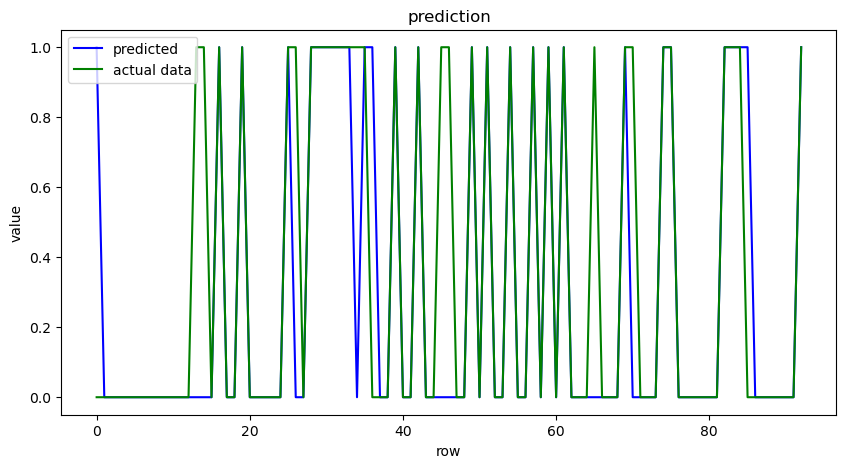

In [169]:
analyze_model_on_test_set(["sensor_2"], model_RNN_1, 10, 5)

In [171]:
# Pick the feature columns. 
sequence_cols_25 = train_set.columns[2:-1]

In [173]:
seq_gen = (list(sequence_generator(train_set_norm[train_set_norm['engine']==id], sequence_length, sequence_cols_25)) #We will take all the features (25).
           for id in train_set_norm['engine'].unique())

# Concatenate the sequences of the different engine ids into one and convert it into a NumPy array [(142, 50, 25), ...] --> [(ntotal, 50, 25)].
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)

#The shape denotes (number of samples, number of time steps, number of features).
seq_set_f25.shape

(15631, 50, 13)

In [175]:
features_dim = seq_set_f25.shape[2] # number of features (25).
out_dim = label_set.shape[1] # One label (failure_within_w1).

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

Features dimension:  13
Output dimension:  1


In [181]:
model_RNN_2 = Sequential([
    
    layers.SimpleRNN(units=5,
                     return_sequences=True,
                     input_shape=(sequence_length, features_dim)),
    layers.Dropout(0.2),
    layers.SimpleRNN(units=3, 
                     return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(units=out_dim, activation='sigmoid')
])

model_RNN_2.summary()

model_RNN_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_RNN_2.fit(seq_set_f25, label_set,batch_size=16,epochs=30,validation_split=0.2, callbacks=early_stop)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50, 5)             95        
                                                                 
 dropout_1 (Dropout)         (None, 50, 5)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3)                 27        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
782/7

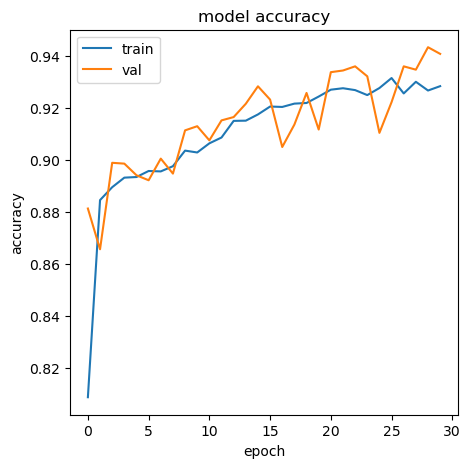

In [183]:
plot_model_accuracy(history)

In [185]:
analyze_model_on_train_set(seq_set_f25, model_RNN_2)

313/313 [==============================] - 1s 5ms/step - loss: 0.1459 - accuracy: 0.9425
Train Accurracy: 0.9424861073493958
79/79 [==============================] - 1s 5ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[10275   256]
 [  643  4457]]
Train Precision =  0.9456821557394441 
 Train Recall =  0.873921568627451


3/3 - 0s - loss: 0.1657 - accuracy: 0.9247 - 78ms/epoch - 26ms/step
Test Accurracy: 0.9247311949729919
3/3 [==============================] - 0s 8ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[58  2]
 [ 5 28]]
Test Precision:  0.9333333333333333 
 Test Recall:  0.8484848484848485 
 Test F1-score: 0.888888888888889


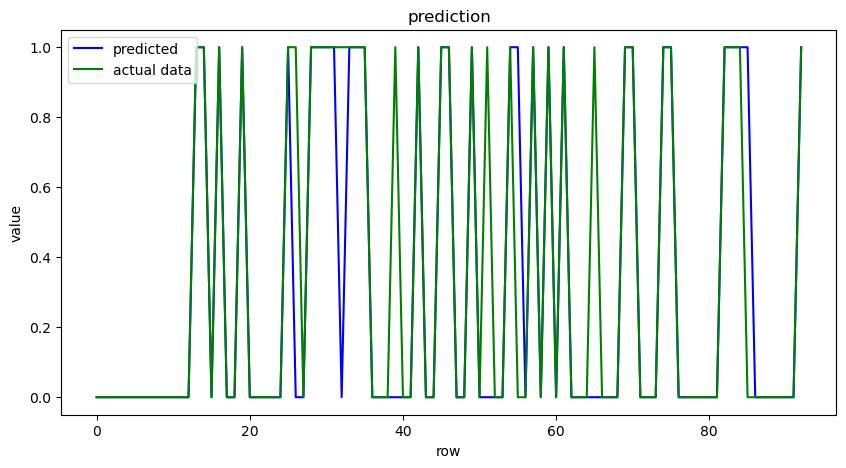

In [187]:
analyze_model_on_test_set(sequence_cols_25,model_RNN_2,10, 5)

In [226]:
model_RNN_3 = Sequential([
    # Bidirectional RNN with more units to capture dependencies
    layers.Bidirectional(
        layers.SimpleRNN(units=32,  # Increased number of units
                         return_sequences=True,
                         input_shape=(sequence_length, features_dim))),
    
    layers.Dropout(0.1),  # Slightly increased dropout to prevent overfitting
    
    # Adding another RNN layer, now also bidirectional
    layers.SimpleRNN(units=16,  # More units to capture features at a higher level
                         return_sequences=False),
    
    layers.Dropout(0.1),  # Keep dropout
    
    # Dense layer with the correct activation based on the task (sigmoid for binary classification)
    layers.Dense(units=out_dim, activation='sigmoid' if out_dim == 1 else 'softmax')  # Use softmax for multi-class
])


# model_RNN_3.summary()

model_RNN_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_RNN_3.fit(seq_set_f25, label_set,batch_size=400,epochs=40,validation_split=0.2, callbacks=early_stop)

Epoch 1/40
32/32 [==============================] - 9s 213ms/step - loss: 0.4761 - accuracy: 0.7844 - val_loss: 0.3031 - val_accuracy: 0.8775
Epoch 2/40
32/32 [==============================] - 2s 56ms/step - loss: 0.2552 - accuracy: 0.9083 - val_loss: 0.2232 - val_accuracy: 0.9165
Epoch 3/40
32/32 [==============================] - 2s 66ms/step - loss: 0.1982 - accuracy: 0.9286 - val_loss: 0.2122 - val_accuracy: 0.9143
Epoch 4/40
32/32 [==============================] - 2s 67ms/step - loss: 0.1773 - accuracy: 0.9339 - val_loss: 0.1626 - val_accuracy: 0.9402
Epoch 5/40
32/32 [==============================] - 2s 67ms/step - loss: 0.1608 - accuracy: 0.9383 - val_loss: 0.1374 - val_accuracy: 0.9488
Epoch 6/40
32/32 [==============================] - 2s 67ms/step - loss: 0.1398 - accuracy: 0.9460 - val_loss: 0.1559 - val_accuracy: 0.9284
Epoch 7/40
32/32 [==============================] - 2s 64ms/step - loss: 0.1462 - accuracy: 0.9423 - val_loss: 0.1599 - val_accuracy: 0.9290
Epoch 8/40
3

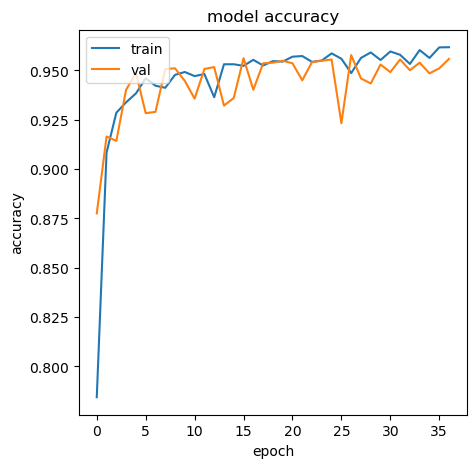

In [228]:
plot_model_accuracy(history)

In [230]:
analyze_model_on_train_set(seq_set_f25, model_RNN_3)

313/313 [==============================] - 6s 20ms/step - loss: 0.1021 - accuracy: 0.9577
Train Accurracy: 0.9577122330665588
79/79 [==============================] - 3s 31ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[10433    98]
 [  563  4537]]
Train Precision =  0.978856526429342 
 Train Recall =  0.8896078431372549


3/3 - 0s - loss: 0.1705 - accuracy: 0.9462 - 104ms/epoch - 35ms/step
Test Accurracy: 0.9462365508079529
3/3 [==============================] - 0s 20ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[58  2]
 [ 3 30]]
Test Precision:  0.9375 
 Test Recall:  0.9090909090909091 
 Test F1-score: 0.923076923076923


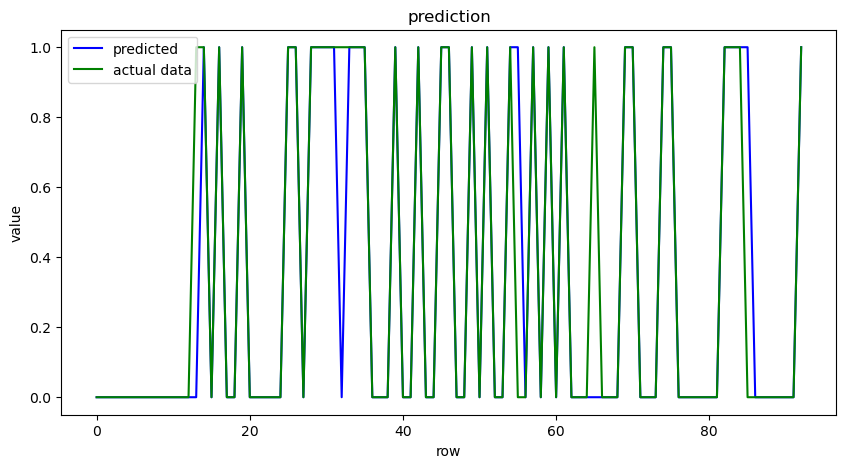

In [232]:
analyze_model_on_test_set(sequence_cols_25,model_RNN_3,10, 5)

In [254]:
model_LSTM_4 = Sequential([
    # Bidirectional LSTM with more units to capture dependencies
    layers.LSTM(units=100,  # Replacing SimpleRNN with LSTM
                    return_sequences=True,
                    input_shape=(sequence_length, features_dim)),
    
    layers.Dropout(0.2),  # Slightly increased dropout to prevent overfitting
    
    # Adding another LSTM layer (unidirectional)
    layers.LSTM(units=50,  # Replacing SimpleRNN with LSTM
                return_sequences=False),
    # layers.BatchNormalization(),
    
    layers.Dropout(0.2),  # Keep dropout
    
    # Dense layer with the correct activation based on the task (sigmoid for binary classification)
    layers.Dense(units=out_dim, activation='sigmoid' if out_dim == 1 else 'softmax')  # Use softmax for multi-class
])



# model_RNN_3.summary()

model_LSTM_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_LSTM_4.fit(seq_set_f25, label_set,batch_size=400,epochs=50,validation_split=0.2, callbacks=early_stop)

Epoch 1/50
32/32 [==============================] - 134s 4s/step - loss: 0.4512 - accuracy: 0.7845 - val_loss: 0.2745 - val_accuracy: 0.8890
Epoch 2/50
32/32 [==============================] - 136s 4s/step - loss: 0.2487 - accuracy: 0.9087 - val_loss: 0.2240 - val_accuracy: 0.9079
Epoch 3/50
32/32 [==============================] - 139s 4s/step - loss: 0.1895 - accuracy: 0.9307 - val_loss: 0.2170 - val_accuracy: 0.9117
Epoch 4/50
32/32 [==============================] - 134s 4s/step - loss: 0.1380 - accuracy: 0.9467 - val_loss: 0.1368 - val_accuracy: 0.9408
Epoch 5/50
32/32 [==============================] - 142s 4s/step - loss: 0.1303 - accuracy: 0.9479 - val_loss: 0.1322 - val_accuracy: 0.9511
Epoch 6/50
32/32 [==============================] - 138s 4s/step - loss: 0.1242 - accuracy: 0.9490 - val_loss: 0.1208 - val_accuracy: 0.9533
Epoch 7/50
32/32 [==============================] - 139s 4s/step - loss: 0.1278 - accuracy: 0.9490 - val_loss: 0.1308 - val_accuracy: 0.9396
Epoch 8/50
32

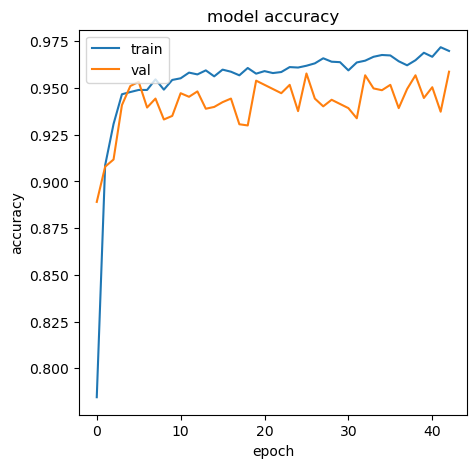

In [268]:
plot_model_accuracy(history)

In [272]:
analyze_model_on_train_set(seq_set_f25, model_LSTM_4)

313/313 [==============================] - 72s 230ms/step - loss: 0.0744 - accuracy: 0.9695
Train Accurracy: 0.969547688961029
79/79 [==============================] - 67s 812ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[10296   235]
 [  241  4859]]
Train Precision =  0.9538672948566942 
 Train Recall =  0.9527450980392157


3/3 - 0s - loss: 0.1446 - accuracy: 0.9462 - 488ms/epoch - 163ms/step
Test Accurracy: 0.9462365508079529
3/3 [==============================] - 0s 128ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[58  2]
 [ 3 30]]
Test Precision:  0.9375 
 Test Recall:  0.9090909090909091 
 Test F1-score: 0.923076923076923


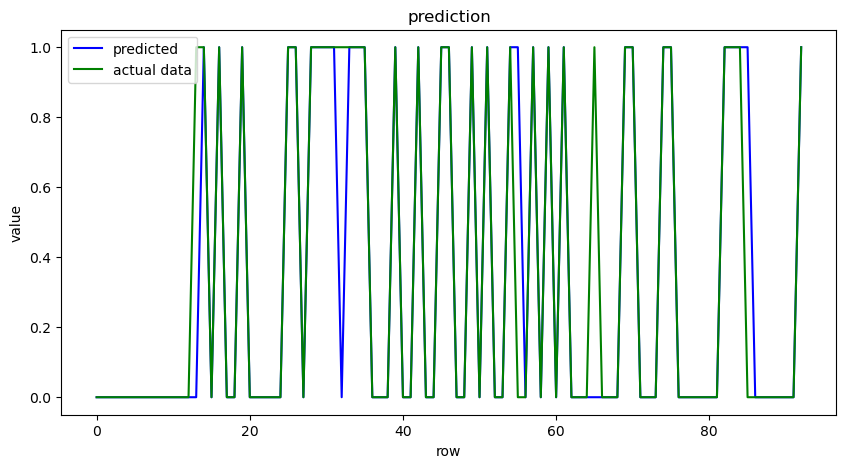

In [274]:
analyze_model_on_test_set(sequence_cols_25,model_LSTM_4,10, 5)